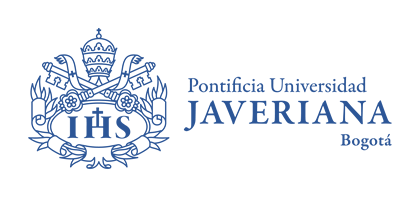

# Visualización de Datos- Taller Análisis NCHS
- Juan Sebastián Vargas Torres
- Daniel Mauricio Ardila
- Diego Caballero Sarmiento

# Contexto

Estos son datos de encuestas recopilados por el Centro Nacional de Estadísticas de Salud de EE. UU. (NCHS, por sus siglas en inglés) que ha
llevó a cabo una serie de encuestas sobre salud y nutrición desde principios de la década de 1960. Desde 1999 aproximadamente 5.000 personas de todas las edades son entrevistadas en sus hogares cada año y completan la encuesta de salud componente de examen de la encuesta. El examen de salud se lleva a cabo en un examen móvil. centro (MEC). La población objetivo de NHANES es “la población residente civil no institucionalizada de los Estados Unidos”. 


Nuestro conjunto de datos se deriva de los datos disponibles para los años de muestra 2009-2010 y 2011-2012 y tiene aproximadamente 10.000 observaciones (personas) y unas 70 variables. NHANES, (Encuestas de Examen Nacional de Salud y Nutrición de los Estados Unidos), utiliza encuestas complejas diseños (ver http://www.cdc.gov/nchs/data/series/sr_02/sr02_162 pdf) que sobremuestrean ciertos subpoblaciones como minorías raciales. El análisis ingenuo de los datos originales de NHANES puede conducir a conclusiones equivocadas. Los porcentajes de personas de cada grupo racial en los datos, por ejemplo, son muy diferente de la forma en que son en la población. Hemos vuelto a muestrear los datos de NHANES para deshacer estos efectos de sobremuestreo. Nuestros datos son para ser tratados, con fines educativos, como una muestra aleatoria simple de la población estadounidense.

# Import necesarios

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lectura de datos

In [ ]:
health_df= pd.read_csv("https://github.com/Sebas102507/NationalCenterforHealthStatisticsAnalysis/blob/main/Data/NHANES2009-2012.csv?raw=true")

# Funciones útiles

In [ ]:
def  getLimitsAndMedian(attribute, n=1.5):

  # Cuartil 1
  q1 = attribute.quantile(0.25)
 
  # Cuartil 3
  q3 = attribute.quantile(0.75)

  med = attribute.median()
  
  # IQR
  iqr = q3-q1
  
  upper_bound = q3+(n*iqr)
  lower_bound = q1-(n*iqr)

  print("Q1: ",q1," Q3: ", q3," Median: ", med," IQR: ", iqr)
  return upper_bound, lower_bound, med

# Exploración

## Head de los 5 primeros

In [ ]:
health_df.head(5)

,Gender,Age,Race1,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,...,SmokeAge,Marijuana,AgeFirstMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SexOrientation,ID
0,female,28,White,CollegeGrad,Married,more 99999,100000.0,5.00,5.0,Own,...,NaN,Yes,15.0,Yes,Yes,13.0,20.0,1.0,Heterosexual,55829
1,male,14,White,NaN,NaN,75000-99999,87500.0,4.17,4.0,Own,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57112
2,male,80,White,8thGrade,Married,20000-24999,22500.0,1.58,6.0,Own,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60232
3,male,22,White,HighSchool,NeverMarried,45000-54999,50000.0,1.85,7.0,Rent,...,9.0,Yes,10.0,Yes,Yes,18.0,3.0,1.0,Heterosexual,59919
4,male,1,White,NaN,NaN,25000-34999,30000.0,1.45,7.0,Own,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56351


## Tamaño

In [ ]:
health_df.shape

(8828, 27)

## Datos generales de columnas

In [ ]:
health_df.columns

Index(['Gender', 'Age', 'Race1', 'Education', 'MaritalStatus', 'HHIncome',
       'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Weight', 'Length',
       'Height', 'BMI', 'Diabetes', 'DiabetesAge', 'Depressed', 'nPregnancies',
       'nBabies', 'Age1stBaby', 'TVHrsDay', 'CompHrsDay', 'AlcoholDay',
       'AlcoholYear', 'SmokeNow', 'SmokeAge', 'Marijuana', 'AgeFirstMarij',
       'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartnLife', 'SexNumPartYear',
       'SexOrientation', 'ID'],
      dtype='object')

In [ ]:
health_df.isna().sum()

Gender                0
Age                   0
Race1                 0
Education          2779
MaritalStatus      2769
HHIncome            811
HHIncomeMid         811
Poverty             726
HomeRooms            69
HomeOwn              63
Weight               78
Length             9457
Height              353
BMI                 366
Diabetes            142
DiabetesAge        9371
Depressed          3327
nPregnancies       7396
nBabies            7584
Age1stBaby         8116
TVHrsDay           5141
CompHrsDay         5137
AlcoholDay         5086
AlcoholYear        4078
SmokeNow           6789
SmokeAge           6920
Marijuana          5059
AgeFirstMarij      7109
HardDrugs          4235
SexEver            4233
SexAge             4460
SexNumPartnLife    4275
SexNumPartYear     5072
SexOrientation     5158
ID                    0
dtype: int64

In [ ]:
health_df.dtypes

Gender              object
Age                  int64
Race1               object
Education           object
MaritalStatus       object
HHIncome            object
HHIncomeMid        float64
Poverty            float64
HomeRooms          float64
HomeOwn             object
Weight             float64
Length             float64
Height             float64
BMI                float64
Diabetes            object
DiabetesAge        float64
Depressed           object
nPregnancies       float64
nBabies            float64
Age1stBaby         float64
TVHrsDay            object
CompHrsDay          object
AlcoholDay         float64
AlcoholYear        float64
SmokeNow            object
SmokeAge           float64
Marijuana           object
AgeFirstMarij      float64
HardDrugs           object
SexEver             object
SexAge             float64
SexNumPartnLife    float64
SexNumPartYear     float64
SexOrientation      object
ID                   int64
dtype: object

### Columnas

#### Gender

In [ ]:
health_df["Gender"].value_counts()

female    5020
male      4980
Name: Gender, dtype: int64

In [ ]:
health_df["Gender"].unique()

array(['female', 'male'], dtype=object)

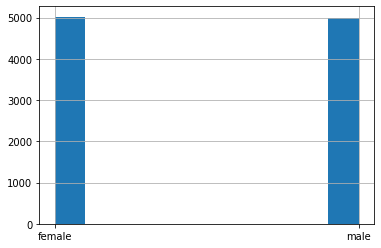

In [ ]:
health_df["Gender"].hist()

In [ ]:
health_df["Gender"].describe()

count      10000
unique         2
top       female
freq        5020
Name: Gender, dtype: object

#### Age

In [ ]:
health_df["Age"].value_counts()

80    333
50    171
4     170
30    166
39    166
     ... 
77     49
78     48
76     48
75     42
79     39
Name: Age, Length: 81, dtype: int64

In [ ]:
health_df["Age"].unique()

array([28, 14, 80, 22,  1, 39, 18, 61, 73, 40, 20, 56, 12, 62,  3, 10, 25,
       26, 74, 53, 55, 47,  5, 72, 29, 78, 36,  7, 16, 70, 54, 65, 43, 60,
       23, 17, 45, 37,  8, 64, 52, 19, 50, 21, 34, 59, 32, 24,  4, 31, 30,
       49, 71,  9, 13,  0, 27, 38, 57, 42, 58,  6, 67, 33, 44, 66, 15, 48,
       51, 41, 11,  2, 46, 63, 35, 68, 77, 69, 75, 76, 79])

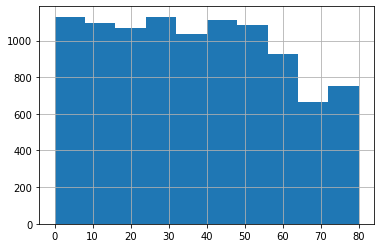

In [ ]:
health_df["Age"].hist()

In [ ]:
health_df["Age"].describe()

count    10000.000000
mean        36.742100
std         22.397566
min          0.000000
25%         17.000000
50%         36.000000
75%         54.000000
max         80.000000
Name: Age, dtype: float64

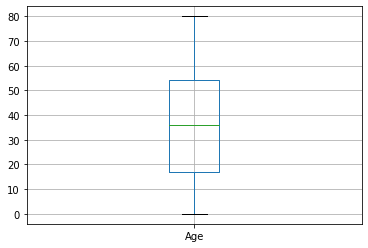

In [ ]:
health_df.boxplot(column=["Age"])

#### Race1

In [ ]:
health_df["Race1"].value_counts()

White       6372
Black       1197
Mexican     1015
Other        806
Hispanic     610
Name: Race1, dtype: int64

In [ ]:
health_df["Race1"].unique()

array(['White', 'Other', 'Mexican', 'Hispanic', 'Black'], dtype=object)

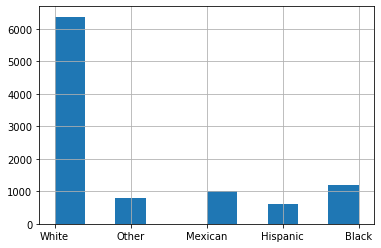

In [ ]:
health_df["Race1"].hist()

In [ ]:
health_df["Race1"].describe()

count     10000
unique        5
top       White
freq       6372
Name: Race1, dtype: object

#### Education

In [ ]:
health_df["Education"].value_counts()

SomeCollege    2267
CollegeGrad    2098
HighSchool     1517
9_11thGrade     888
8thGrade        451
Name: Education, dtype: int64

In [ ]:
health_df["Education"].unique()

array(['CollegeGrad', nan, '8thGrade', 'HighSchool', 'SomeCollege',
       '9_11thGrade'], dtype=object)

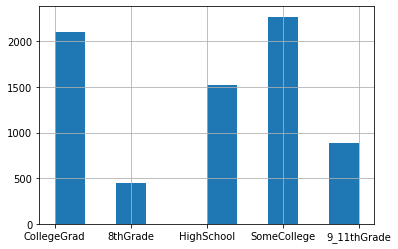

In [ ]:
health_df["Education"].hist()

In [ ]:
health_df["Education"].describe()

count            7221
unique              5
top       SomeCollege
freq             2267
Name: Education, dtype: object

#### MaritalStatus

In [ ]:
health_df["MaritalStatus"].value_counts()

Married         3945
NeverMarried    1380
Divorced         707
LivePartner      560
Widowed          456
Separated        183
Name: MaritalStatus, dtype: int64

In [ ]:
health_df["MaritalStatus"].unique()

array(['Married', nan, 'NeverMarried', 'Divorced', 'Widowed',
       'LivePartner', 'Separated'], dtype=object)

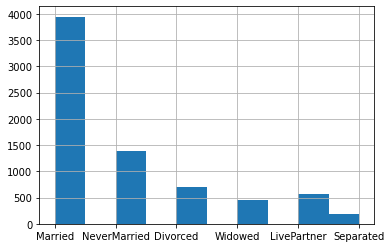

In [ ]:
health_df["MaritalStatus"].hist()

In [ ]:
health_df["MaritalStatus"].describe()

count        7231
unique          6
top       Married
freq         3945
Name: MaritalStatus, dtype: object

#### HHIncome

In [ ]:
health_df["HHIncome"].value_counts()

more 99999     2220
75000-99999    1084
25000-34999     958
35000-44999     863
45000-54999     784
55000-64999     621
20000-24999     617
10000-14999     543
15000-19999     527
65000-74999     526
5000-9999       254
0-4999          192
Name: HHIncome, dtype: int64

In [ ]:
health_df["HHIncome"].unique()

array(['more 99999', '75000-99999', '20000-24999', '45000-54999',
       '25000-34999', '15000-19999', '10000-14999', '65000-74999', nan,
       '35000-44999', '5000-9999', '55000-64999', '0-4999'], dtype=object)

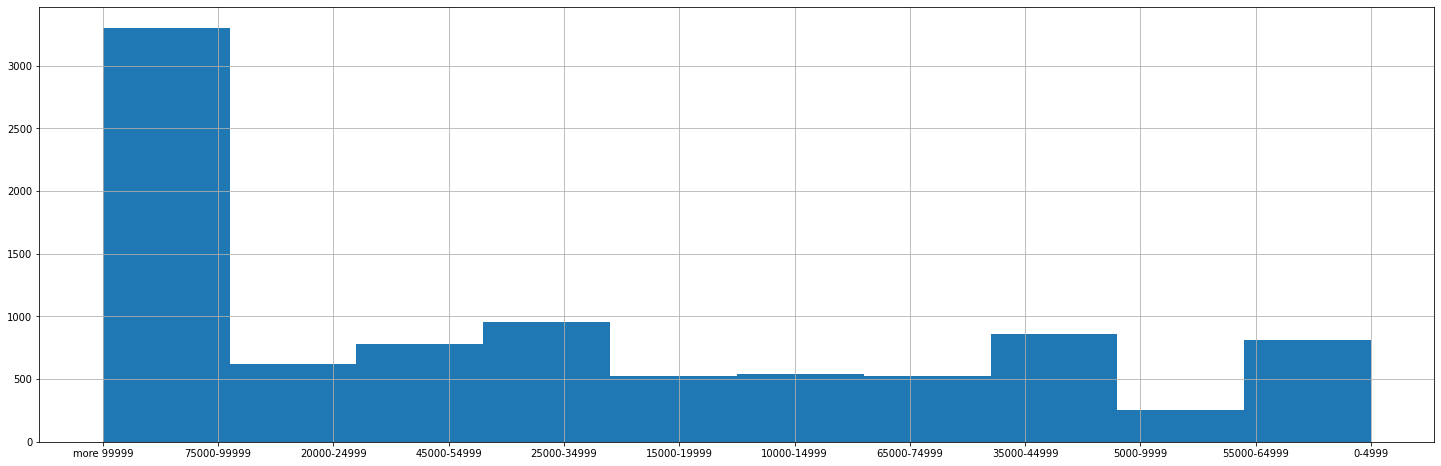

In [ ]:
plt.figure(figsize=(25,8))
health_df["HHIncome"].hist()

In [ ]:
health_df["HHIncome"].describe()

count           9189
unique            12
top       more 99999
freq            2220
Name: HHIncome, dtype: object

#### HHIncomeMid

In [ ]:
health_df["HHIncomeMid"].value_counts()

100000.0    2220
87500.0     1084
30000.0      958
40000.0      863
50000.0      784
60000.0      621
22500.0      617
12500.0      543
17500.0      527
70000.0      526
7500.0       254
2500.0       192
Name: HHIncomeMid, dtype: int64

In [ ]:
health_df["HHIncomeMid"].unique()

array([100000.,  87500.,  22500.,  50000.,  30000.,  17500.,  12500.,
        70000.,     nan,  40000.,   7500.,  60000.,   2500.])

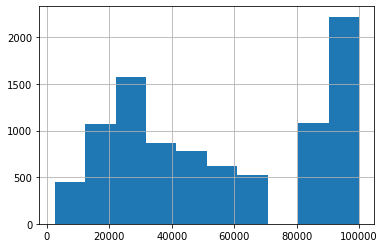

In [ ]:
health_df["HHIncomeMid"].hist()

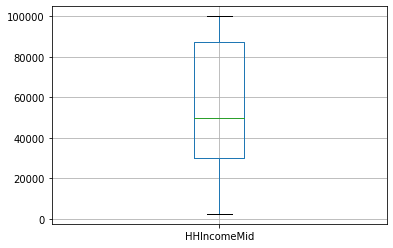

In [ ]:
health_df.boxplot(column=["HHIncomeMid"])

In [ ]:
health_df["HHIncomeMid"].describe()

count      9189.000000
mean      57206.170421
std       33020.276584
min        2500.000000
25%       30000.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

#### Poverty

In [ ]:
health_df["Poverty"].value_counts()

5.00    2094
2.33      73
4.54      72
3.43      70
0.00      69
        ... 
2.19       1
3.81       1
2.84       1
3.59       1
4.82       1
Name: Poverty, Length: 450, dtype: int64

In [ ]:
health_df["Poverty"].unique()

array([5.  , 4.17, 1.58, 1.85, 1.45, 0.9 , 3.49, 0.76, 1.74, 0.91,  nan,
       2.4 , 0.6 , 4.37, 0.12, 2.71, 4.8 , 1.75, 2.75, 3.  , 0.86, 3.82,
       0.27, 1.99, 0.98, 0.73, 4.46, 1.37, 4.12, 0.68, 3.2 , 0.5 , 4.04,
       3.5 , 0.57, 2.33, 1.69, 0.66, 2.13, 0.75, 2.81, 4.08, 2.2 , 1.09,
       3.6 , 1.95, 0.59, 2.86, 2.95, 2.17, 0.61, 1.72, 1.53, 2.18, 3.17,
       1.55, 3.51, 2.06, 0.78, 3.8 , 2.46, 4.1 , 1.81, 1.24, 3.98, 3.69,
       1.59, 3.28, 1.29, 1.08, 1.67, 0.58, 4.43, 3.09, 1.13, 0.07, 0.36,
       1.11, 0.01, 0.45, 4.23, 4.54, 1.36, 2.26, 0.63, 3.01, 3.55, 4.92,
       2.62, 0.51, 1.79, 1.78, 2.91, 0.32, 3.1 , 1.63, 0.28, 1.42, 0.82,
       1.41, 3.23, 3.63, 4.31, 0.93, 2.73, 1.16, 4.65, 4.62, 0.72, 1.91,
       1.15, 4.71, 1.5 , 0.69, 0.16, 3.68, 4.59, 3.84, 0.96, 1.64, 3.39,
       3.85, 0.97, 0.92, 4.67, 4.26, 1.86, 3.43, 1.19, 2.57, 4.16, 1.8 ,
       3.44, 3.97, 2.31, 0.74, 4.27, 1.92, 1.34, 1.44, 0.44, 2.77, 1.  ,
       2.16, 3.77, 1.39, 0.79, 0.87, 1.66, 1.35, 3.

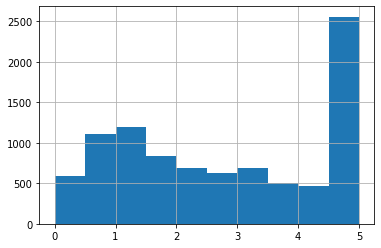

In [ ]:
health_df["Poverty"].hist()

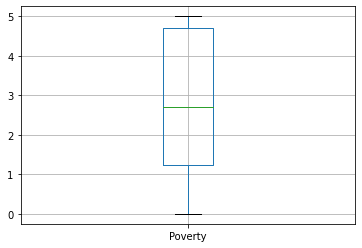

In [ ]:
health_df.boxplot(column=["Poverty"])

In [ ]:
health_df["Poverty"].describe()

count    9274.000000
mean        2.801844
std         1.677909
min         0.000000
25%         1.240000
50%         2.700000
75%         4.710000
max         5.000000
Name: Poverty, dtype: float64

#### HomeRooms

In [ ]:
health_df["HomeRooms"].value_counts()

6.0     1760
5.0     1743
4.0     1537
7.0     1479
8.0     1026
9.0      637
3.0      614
10.0     456
11.0     249
13.0     120
12.0     111
2.0      109
1.0       90
Name: HomeRooms, dtype: int64

In [ ]:
health_df["HomeRooms"].unique()

array([ 5.,  4.,  6.,  7., 12.,  8., 10.,  3., nan, 11.,  1.,  9., 13.,
        2.])

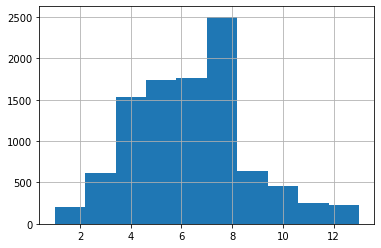

In [ ]:
health_df["HomeRooms"].hist()

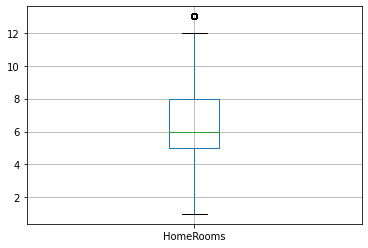

In [ ]:
health_df.boxplot(column=["HomeRooms"])

In [ ]:
health_df["HomeRooms"].describe()

count    9931.000000
mean        6.248918
std         2.277538
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        13.000000
Name: HomeRooms, dtype: float64

#### HomeOwn

In [ ]:
health_df["HomeOwn"].value_counts()

Own      6425
Rent     3287
Other     225
Name: HomeOwn, dtype: int64

In [ ]:
health_df["HomeOwn"].unique()

array(['Own', 'Rent', nan, 'Other'], dtype=object)

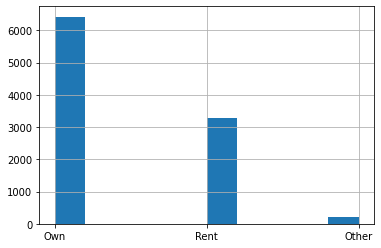

In [ ]:
health_df["HomeOwn"].hist()

In [ ]:
health_df["HomeOwn"].describe()

count     9937
unique       3
top        Own
freq      6425
Name: HomeOwn, dtype: object

#### Weight

In [ ]:
health_df["Weight"].value_counts()

78.1     35
61.7     34
61.5     33
73.8     32
68.0     29
         ..
29.8      1
4.2       1
120.2     1
130.0     1
155.4     1
Name: Weight, Length: 1290, dtype: int64

In [ ]:
health_df["Weight"].unique()

array([ 61. ,  88.9,   nan, ..., 184.5,  41.4, 155.4])

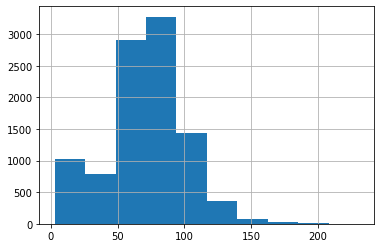

In [ ]:
health_df["Weight"].hist()

In [ ]:
health_df["Weight"].describe()

count    9922.000000
mean       70.981798
std        29.125357
min         2.800000
25%        56.100000
50%        72.700000
75%        88.900000
max       230.700000
Name: Weight, dtype: float64

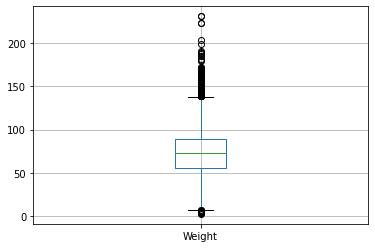

In [ ]:
health_df.boxplot(column=["Weight"])

#### Length

In [ ]:
health_df["Length"].value_counts()

96.8     7
86.1     7
93.6     6
90.0     6
102.8    6
        ..
77.8     1
108.6    1
62.6     1
91.3     1
97.6     1
Name: Length, Length: 309, dtype: int64

In [ ]:
health_df["Length"].unique()

array([  nan,  78.1, 100.6,  97.1,  77.2,  74. , 105.7,  58.5,  59.2,
        91.5,  73. ,  92.5,  71.3,  56.6,  97.3,  99.6, 102.1,  60.6,
        70.6,  67.9,  88.3,  47.1, 100.3,  80.5,  65.3,  98.8,  90.3,
        70.8,  95.3,  77.9,  66.3,  60.9,  88. , 104.1,  89.5,  89. ,
        93.4,  87.5,  55.1, 100. ,  75.9,  90.4,  80. ,  92.3,  65. ,
        91.1,  75.6,  99.2,  96.8,  82.7,  81.2,  76.8,  87.3,  80.3,
        80.7,  78.7,  71.4,  73.1,  62.7,  84. ,  85.1, 103.6,  84.6,
        84.4,  62.3,  89.7,  85.4,  57.6, 100.5, 101.7,  86.5,  82.1,
        94.9,  69.2,  78.2,  86.1,  96. ,  66. , 107. ,  75.8,  95.8,
        90.1,  89.6,  64.7,  72.4,  73.3,  74.7, 104.7, 109.8,  96.7,
        86.2,  86.9,  63.4,  72.5,  61.2, 107.7,  84.8,  91.2,  94.7,
        81.8,  74.4, 102.8, 101.9,  68.9,  52.6,  74.9,  71.1,  93.5,
        93.6,  96.3,  88.7,  73.2,  92.4,  87.1,  67.3,  81.4,  81.7,
        81.6, 109.9,  85.5,  58.7,  83.2,  74.2,  67. ,  97. ,  61.6,
        93.9,  88.8,

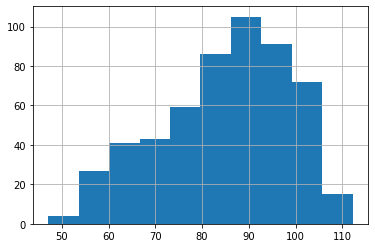

In [ ]:
health_df["Length"].hist()

In [ ]:
health_df["Length"].describe()

count    543.000000
mean      85.016022
std       13.705026
min       47.100000
25%       75.700000
50%       87.000000
75%       96.100000
max      112.200000
Name: Length, dtype: float64

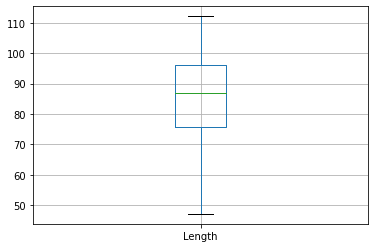

In [ ]:
health_df.boxplot(column=["Length"])

#### Height

In [ ]:
health_df["Height"].value_counts()

173.2    53
163.6    48
177.1    46
163.1    45
160.8    43
         ..
86.4      1
195.5     1
121.1     1
89.9      1
98.6      1
Name: Height, Length: 980, dtype: int64

In [ ]:
health_df["Height"].unique()

array([161.8, 162.3,   nan, 170.1, 165.5, 183. , 164.2, 176.5, 170.4,
       168.9, 180.2, 174.4, 154. , 100. , 145.5, 171.8, 169.7, 162.8,
       177.6, 163.7, 183.6, 177.9, 119.3, 169.6, 163.9, 168.1, 125.5,
       154.7, 171.2, 167. , 169.8, 188.3, 164.4, 163.3, 167.6, 160.8,
       172.6, 173.8, 130.6, 176. , 166. , 181. , 177.5, 165.1, 166.5,
       180.7, 159.9, 149. , 166.1, 183.7, 162.7, 159.7, 158.3, 186.3,
       166.6, 143.2, 166.2, 148.6, 114.9, 165. , 162.4,  95.5, 167.9,
       158.2, 160.5, 153.8, 171.7, 141.9, 165.3, 163.4, 175.3, 155.4,
       165.7, 171.6, 182.1, 158.9, 173.7, 150.4, 176.6, 103.9, 174.3,
       179.5, 173.9, 171.3, 161. , 182. , 158.7, 175.1, 157.4, 162. ,
       164.7, 175. , 181.3, 174.1, 169.1, 107.9, 157.2, 192.6, 116.9,
       118.5, 175.5, 168. , 163. , 121.4, 151.8, 173.1, 155.9, 138.4,
       160.9, 159. , 157.3, 119. , 154.6, 104.2, 163.5, 161.2, 159.1,
       173.4, 171.1, 170.6, 174. , 181.4, 185.9, 177.4, 177.1, 168.2,
       155.1, 140.1,

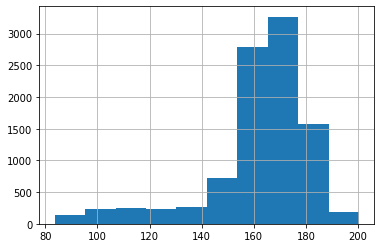

In [ ]:
health_df["Height"].hist()

In [ ]:
health_df["Height"].describe()

count    9647.000000
mean      161.877838
std        20.186567
min        83.600000
25%       156.800000
50%       166.000000
75%       174.500000
max       200.400000
Name: Height, dtype: float64

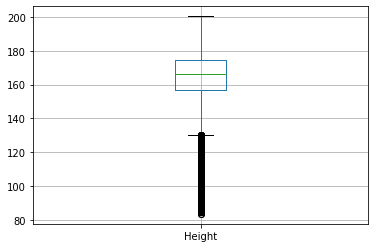

In [ ]:
health_df.boxplot(column=["Height"])

#### BMI

In [ ]:
health_df["BMI"].value_counts()

23.20    53
25.60    52
26.40    46
23.30    44
24.70    43
         ..
30.53     1
16.74     1
52.03     1
26.64     1
39.80     1
Name: BMI, Length: 2073, dtype: int64

In [ ]:
health_df["BMI"].unique()

array([23.3 , 33.75,   nan, ..., 63.3 , 47.3 , 39.8 ])

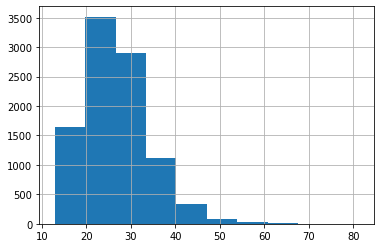

In [ ]:
health_df["BMI"].hist()

In [ ]:
health_df["BMI"].describe()

count    9634.000000
mean       26.660136
std         7.376579
min        12.880000
25%        21.580000
50%        25.980000
75%        30.890000
max        81.250000
Name: BMI, dtype: float64

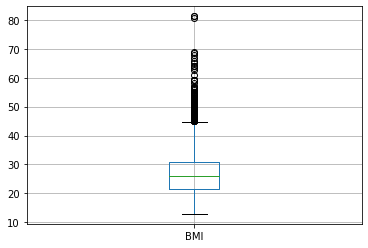

In [ ]:
health_df.boxplot(column=["BMI"])

#### Diabetes

In [ ]:
health_df["Diabetes"].value_counts()

No     9098
Yes     760
Name: Diabetes, dtype: int64

In [ ]:
health_df["Diabetes"].unique()

array(['No', 'Yes', nan], dtype=object)

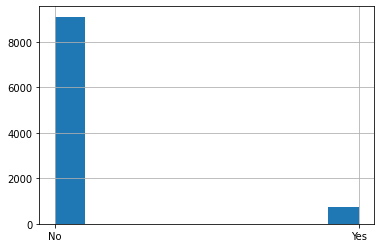

In [ ]:
health_df["Diabetes"].hist()

In [ ]:
health_df["Diabetes"].describe()

count     9858
unique       2
top         No
freq      9098
Name: Diabetes, dtype: object

#### DiabetesAge

In [ ]:
health_df["DiabetesAge"].value_counts()

55.0    39
60.0    35
50.0    35
49.0    28
40.0    27
        ..
13.0     1
23.0     1
77.0     1
20.0     1
8.0      1
Name: DiabetesAge, Length: 72, dtype: int64

In [ ]:
health_df["DiabetesAge"].unique()

array([nan, 57., 50., 17., 42., 48., 62., 55., 53., 58., 70., 51., 21.,
        7., 61., 45., 59., 29., 35., 74., 33., 67., 75., 49., 65., 60.,
       40., 47., 12., 16., 73., 52., 19., 43., 27., 30., 41., 25., 71.,
       46., 64., 63., 37., 80., 32., 56., 76., 72., 66.,  3., 24., 39.,
       31., 23., 68., 69., 79., 44., 38., 54., 14., 22.,  6., 18., 11.,
       15., 13., 28., 77.,  1., 20., 78.,  8.])

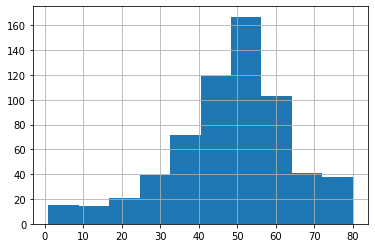

In [ ]:
health_df["DiabetesAge"].hist()

In [ ]:
health_df["DiabetesAge"].describe()

count    629.000000
mean      48.422893
std       15.680504
min        1.000000
25%       40.000000
50%       50.000000
75%       58.000000
max       80.000000
Name: DiabetesAge, dtype: float64

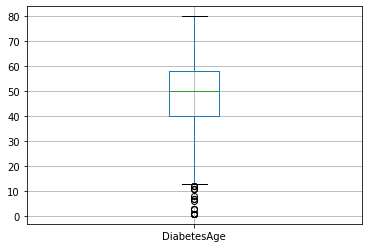

In [ ]:
health_df.boxplot(column=["DiabetesAge"])

#### Depressed

In [ ]:
health_df["Depressed"].value_counts()

None       5246
Several    1009
Most        418
Name: Depressed, dtype: int64

In [ ]:
health_df["Depressed"].unique()

array(['None', nan, 'Most', 'Several'], dtype=object)

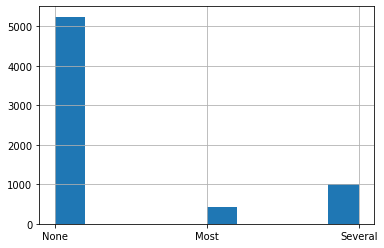

In [ ]:
health_df["Depressed"].hist()

In [ ]:
health_df["Depressed"].describe()

count     6673
unique       3
top       None
freq      5246
Name: Depressed, dtype: object

#### nPregnancies

In [ ]:
health_df["nPregnancies"].value_counts()

2.0     745
3.0     616
1.0     437
4.0     374
5.0     211
6.0     122
7.0      54
8.0      13
9.0      12
10.0     11
11.0      5
12.0      2
32.0      1
13.0      1
Name: nPregnancies, dtype: int64

In [ ]:
health_df["nPregnancies"].unique()

array([nan,  8.,  4.,  1., 12.,  3.,  2.,  5.,  6., 11.,  7.,  9., 10.,
       32., 13.])

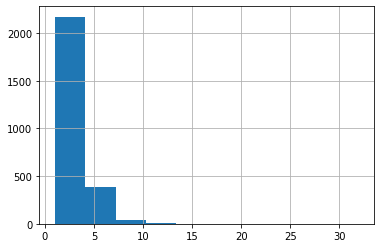

In [ ]:
health_df["nPregnancies"].hist()

In [ ]:
health_df["nPregnancies"].describe()

count    2604.000000
mean        3.026882
std         1.795341
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        32.000000
Name: nPregnancies, dtype: float64

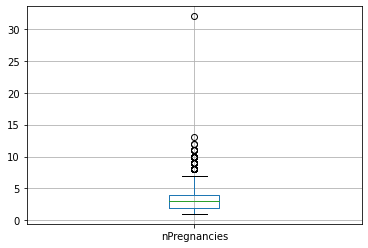

In [ ]:
health_df.boxplot(column=["nPregnancies"])

#### nBabies

In [ ]:
health_df["nBabies"].value_counts()

2.0     942
3.0     559
1.0     521
4.0     219
5.0      89
6.0      46
7.0      20
0.0       7
8.0       7
9.0       3
11.0      2
12.0      1
Name: nBabies, dtype: int64

In [ ]:
health_df["nBabies"].unique()

array([nan,  6.,  4.,  1., 12.,  2.,  5.,  3.,  7., 11.,  0.,  9.,  8.])

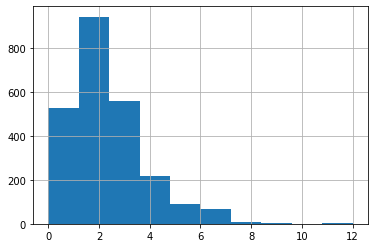

In [ ]:
health_df["nBabies"].hist()

In [ ]:
health_df["nBabies"].describe()

count    2416.000000
mean        2.456954
std         1.315227
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: nBabies, dtype: float64

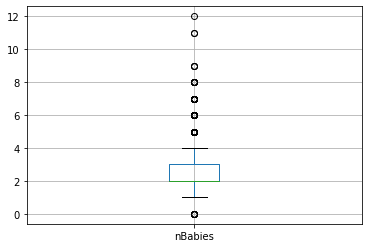

In [ ]:
health_df.boxplot(column=["nBabies"])

#### Age1stBaby

In [ ]:
health_df["Age1stBaby"].value_counts()

20.0    169
21.0    163
19.0    158
23.0    156
18.0    142
22.0    136
24.0    124
17.0    112
25.0    110
16.0     86
26.0     84
27.0     71
28.0     70
29.0     66
30.0     53
15.0     37
31.0     36
32.0     28
33.0     24
34.0     17
35.0     16
14.0     13
37.0     10
36.0      2
39.0      1
Name: Age1stBaby, dtype: int64

In [ ]:
health_df["Age1stBaby"].unique()

array([nan, 17., 27., 18., 25., 35., 20., 26., 21., 15., 23., 22., 31.,
       16., 19., 28., 24., 29., 33., 37., 32., 30., 34., 14., 39., 36.])

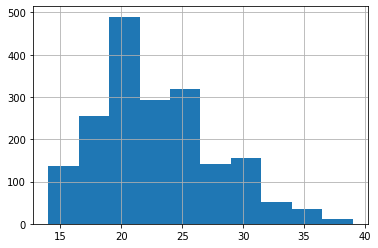

In [ ]:
health_df["Age1stBaby"].hist()

In [ ]:
health_df["Age1stBaby"].describe()

count    1884.000000
mean       22.649682
std         4.772509
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        39.000000
Name: Age1stBaby, dtype: float64

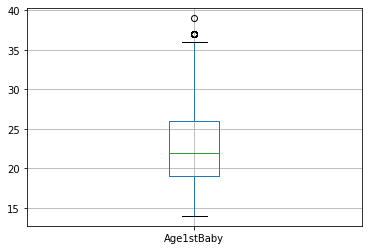

In [ ]:
health_df.boxplot(column=["Age1stBaby"])

#### TVHrsDay

In [ ]:
health_df["TVHrsDay"].value_counts()

2_hr         1275
1_hr          884
3_hr          836
0_to_1_hr     638
More_4_hr     615
4_hr          507
0_hrs         104
Name: TVHrsDay, dtype: int64

In [ ]:
health_df["TVHrsDay"].unique()

array([nan, '2_hr', '3_hr', 'More_4_hr', '4_hr', '0_to_1_hr', '1_hr',
       '0_hrs'], dtype=object)

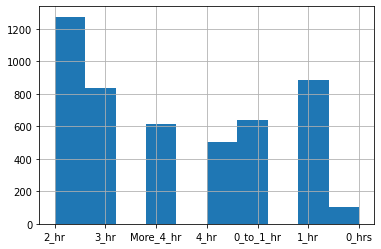

In [ ]:
health_df["TVHrsDay"].hist()

In [ ]:
health_df["TVHrsDay"].describe()

count     4859
unique       7
top       2_hr
freq      1275
Name: TVHrsDay, dtype: object

#### CompHrsDay

In [ ]:
health_df["CompHrsDay"].value_counts()

0_to_1_hr    1409
0_hrs        1073
1_hr         1030
2_hr          589
3_hr          347
More_4_hr     253
4_hr          162
Name: CompHrsDay, dtype: int64

In [ ]:
health_df["CompHrsDay"].unique()

array([nan, '1_hr', 'More_4_hr', '2_hr', '3_hr', '0_to_1_hr', '0_hrs',
       '4_hr'], dtype=object)

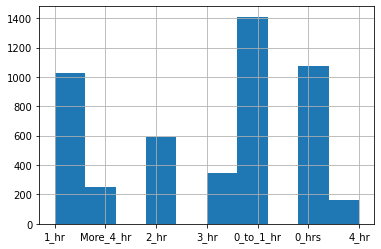

In [ ]:
health_df["CompHrsDay"].hist()

In [ ]:
health_df["CompHrsDay"].describe()

count          4863
unique            7
top       0_to_1_hr
freq           1409
Name: CompHrsDay, dtype: object

#### AlcoholDay

In [ ]:
health_df["AlcoholDay"].value_counts()

1.0     1668
2.0     1368
3.0      689
4.0      366
6.0      275
5.0      221
12.0      84
8.0       76
7.0       60
10.0      51
9.0       11
15.0      10
20.0       8
16.0       6
11.0       4
36.0       3
13.0       3
24.0       2
30.0       2
64.0       2
21.0       1
18.0       1
82.0       1
14.0       1
17.0       1
Name: AlcoholDay, dtype: int64

In [ ]:
health_df["AlcoholDay"].unique()

array([ 3., nan,  4.,  2.,  1.,  6.,  7.,  8.,  5., 10., 12., 20., 16.,
       15., 36.,  9., 13., 24., 30., 11., 21., 18., 82., 14., 64., 17.])

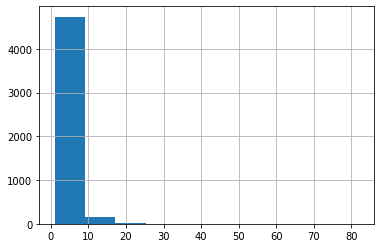

In [ ]:
health_df["AlcoholDay"].hist()

In [ ]:
health_df["AlcoholDay"].describe()

count    4914.000000
mean        2.914123
std         3.182672
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        82.000000
Name: AlcoholDay, dtype: float64

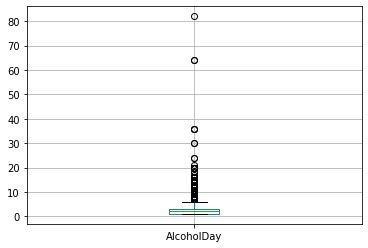

In [ ]:
health_df.boxplot(column=["AlcoholDay"])

#### AlcoholYear

In [ ]:
health_df["AlcoholYear"].value_counts()

0.0      1006
52.0      620
104.0     518
12.0      484
24.0      470
         ... 
90.0        1
25.0        1
65.0        1
182.0       1
138.0       1
Name: AlcoholYear, Length: 62, dtype: int64

In [ ]:
health_df["AlcoholYear"].unique()

array([ 72.,  nan,   0., 156.,   2.,  40., 364.,  24., 104.,   6.,  12.,
         3.,  52., 312.,   1.,   4.,  36., 300.,  96.,   7., 260., 250.,
         5.,   9., 208.,  30.,  10.,  32.,   8.,  60.,  20., 180.,  48.,
       270.,  15.,  84., 144., 240., 360.,  11.,  80.,  14., 288.,  56.,
       200., 168.,  64., 120., 100.,  21.,  13., 183.,  35.,  28.,  90.,
       108.,  25.,  65., 182.,  45., 220., 350., 138.])

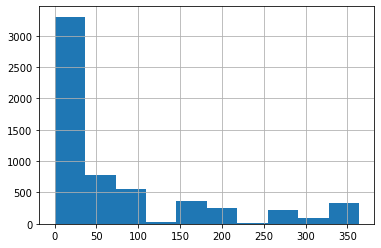

In [ ]:
health_df["AlcoholYear"].hist()

In [ ]:
health_df["AlcoholYear"].describe()

count    5922.000000
mean       75.101655
std       103.033738
min         0.000000
25%         3.000000
50%        24.000000
75%       104.000000
max       364.000000
Name: AlcoholYear, dtype: float64

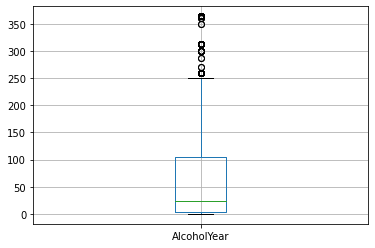

In [ ]:
health_df.boxplot(column=["AlcoholYear"])

#### SmokeNow

In [ ]:
health_df["SmokeNow"].value_counts()

No     1745
Yes    1466
Name: SmokeNow, dtype: int64

In [ ]:
health_df["SmokeNow"].unique()

array([nan, 'No', 'Yes'], dtype=object)

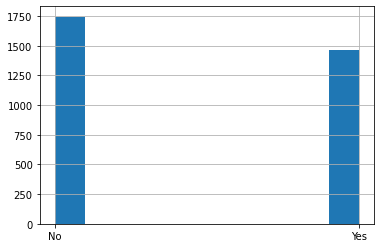

In [ ]:
health_df["SmokeNow"].hist()

In [ ]:
health_df["SmokeNow"].describe()

count     3211
unique       2
top         No
freq      1745
Name: SmokeNow, dtype: object

#### SmokeAge

In [ ]:
health_df["SmokeAge"].value_counts()

18.0    468
16.0    409
15.0    378
17.0    294
14.0    234
19.0    204
20.0    201
13.0    161
12.0    105
21.0     99
22.0     91
25.0     77
23.0     54
30.0     44
10.0     38
24.0     28
11.0     25
28.0     22
9.0      21
35.0     20
45.0     15
27.0     13
26.0     11
36.0     10
8.0       9
7.0       7
40.0      6
29.0      5
6.0       4
52.0      3
32.0      3
38.0      3
31.0      3
50.0      3
33.0      3
72.0      2
39.0      2
34.0      2
58.0      1
46.0      1
41.0      1
Name: SmokeAge, dtype: int64

In [ ]:
health_df["SmokeAge"].unique()

array([nan,  9., 16., 18., 14., 12., 17., 15., 13., 28., 22., 19., 25.,
       21., 11., 23., 24., 20.,  7., 36., 30., 26., 27., 35., 38., 10.,
       40.,  8., 29., 33., 50., 45., 31.,  6., 72., 39., 32., 34., 58.,
       52., 46., 41.])

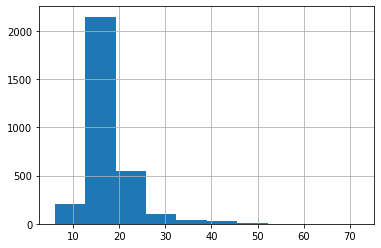

In [ ]:
health_df["SmokeAge"].hist()

In [ ]:
health_df["SmokeAge"].describe()

count    3080.000000
mean       17.826623
std         5.326660
min         6.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        72.000000
Name: SmokeAge, dtype: float64

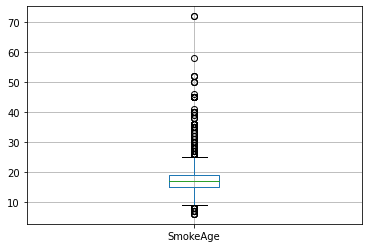

In [ ]:
health_df.boxplot(column=["SmokeAge"])

#### Marijuana

In [ ]:
health_df["Marijuana"].value_counts()

Yes    2892
No     2049
Name: Marijuana, dtype: int64

In [ ]:
health_df["Marijuana"].unique()

array(['Yes', nan, 'No'], dtype=object)

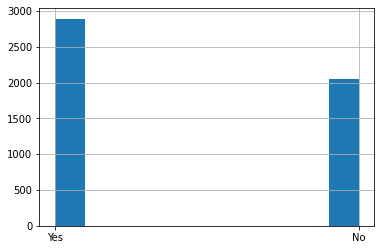

In [ ]:
health_df["Marijuana"].hist()

In [ ]:
health_df["Marijuana"].describe()

count     4941
unique       2
top        Yes
freq      2892
Name: Marijuana, dtype: object

#### AgeFirstMarij

In [ ]:
health_df["AgeFirstMarij"].value_counts()

16.0    500
18.0    393
15.0    372
17.0    292
14.0    252
19.0    224
13.0    158
20.0    151
12.0    127
21.0     91
22.0     68
23.0     41
25.0     41
24.0     31
11.0     29
10.0     20
27.0     19
28.0     15
9.0      11
26.0     10
30.0      6
8.0       5
31.0      5
46.0      5
35.0      4
7.0       3
6.0       3
29.0      3
45.0      2
43.0      2
40.0      1
32.0      1
33.0      1
38.0      1
48.0      1
1.0       1
5.0       1
39.0      1
Name: AgeFirstMarij, dtype: int64

In [ ]:
health_df["AgeFirstMarij"].unique()

array([15., nan, 10., 19., 16., 13., 18.,  8., 17., 11., 20., 14., 23.,
       22., 12., 28., 24., 21., 25., 30.,  7., 27.,  5., 43., 46.,  6.,
        9., 35., 40., 32., 33., 45., 26., 38., 48.,  1., 31., 39., 29.])

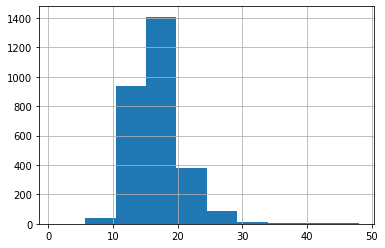

In [ ]:
health_df["AgeFirstMarij"].hist()

In [ ]:
health_df["AgeFirstMarij"].describe()

count    2891.000000
mean       17.022829
std         3.895010
min         1.000000
25%        15.000000
50%        16.000000
75%        19.000000
max        48.000000
Name: AgeFirstMarij, dtype: float64

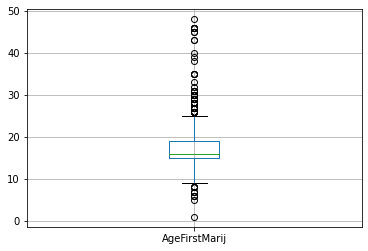

In [ ]:
health_df.boxplot(column=["AgeFirstMarij"])

#### HardDrugs

In [ ]:
health_df["HardDrugs"].value_counts()

No     4700
Yes    1065
Name: HardDrugs, dtype: int64

In [ ]:
health_df["HardDrugs"].unique()

array(['Yes', nan, 'No'], dtype=object)

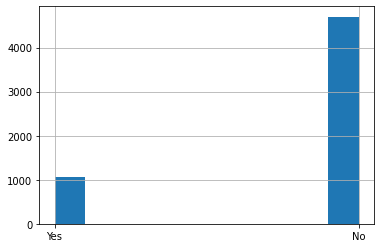

In [ ]:
health_df["HardDrugs"].hist()

In [ ]:
health_df["HardDrugs"].describe()

count     5765
unique       2
top         No
freq      4700
Name: HardDrugs, dtype: object

#### SexEver

In [ ]:
health_df["SexEver"].value_counts()

Yes    5544
No      223
Name: SexEver, dtype: int64

In [ ]:
health_df["SexEver"].unique()

array(['Yes', nan, 'No'], dtype=object)

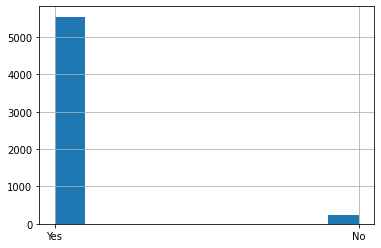

In [ ]:
health_df["SexEver"].hist()

In [ ]:
health_df["SexEver"].describe()

count     5767
unique       2
top        Yes
freq      5544
Name: SexEver, dtype: object

#### SexAge

In [ ]:
health_df["SexAge"].value_counts()

16.0    916
17.0    822
18.0    799
15.0    648
19.0    462
14.0    388
20.0    336
13.0    218
21.0    174
22.0    127
12.0    126
23.0     93
25.0     81
24.0     67
9.0      59
11.0     31
26.0     31
27.0     29
28.0     24
29.0     20
10.0     19
30.0     19
32.0      9
38.0      9
31.0      7
35.0      5
39.0      3
41.0      3
36.0      3
44.0      3
37.0      2
34.0      2
33.0      2
47.0      2
50.0      1
Name: SexAge, dtype: int64

In [ ]:
health_df["SexAge"].unique()

array([13., nan, 18., 15., 14., 19., 22., 21., 17., 26., 16., 29., 37.,
       20., 12., 25., 10., 27., 32.,  9., 23., 24., 11., 38., 30., 39.,
       35., 28., 31., 50., 34., 33., 41., 47., 36., 44.])

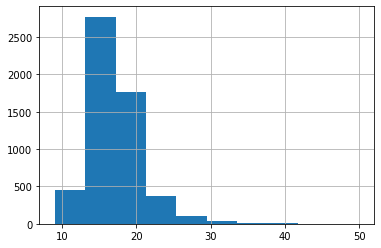

In [ ]:
health_df["SexAge"].hist()

In [ ]:
health_df["SexAge"].describe()

count    5540.000000
mean       17.428700
std         3.716551
min         9.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        50.000000
Name: SexAge, dtype: float64

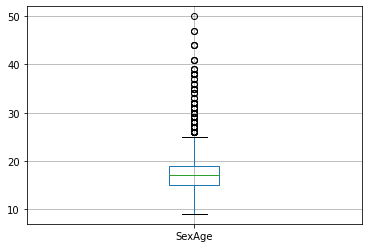

In [ ]:
health_df.boxplot(column=["SexAge"])

#### SexNumPartnLife

In [ ]:
health_df["SexNumPartnLife"].value_counts()

1.0      789
3.0      549
5.0      545
2.0      420
10.0     357
        ... 
360.0      1
500.0      1
42.0       1
120.0      1
72.0       1
Name: SexNumPartnLife, Length: 90, dtype: int64

In [ ]:
health_df["SexNumPartnLife"].unique()

array([2.00e+01,      nan, 3.00e+00, 1.50e+01, 0.00e+00, 5.00e+00,
       1.00e+00, 4.00e+00, 1.00e+01, 6.00e+00, 4.00e+01, 5.00e+01,
       2.30e+01, 1.10e+01, 2.00e+00, 3.00e+01, 1.20e+01, 8.00e+00,
       9.00e+00, 1.40e+01, 1.80e+01, 1.30e+01, 2.50e+01, 1.00e+02,
       7.00e+00, 3.50e+01, 2.50e+02, 1.90e+01, 2.10e+01, 3.80e+01,
       1.50e+02, 5.50e+01, 2.40e+01, 1.70e+01, 3.20e+01, 4.90e+01,
       1.10e+02, 6.00e+01, 4.50e+01, 3.40e+01, 2.88e+02, 8.80e+01,
       3.90e+01, 2.70e+01, 2.20e+01, 7.50e+01, 1.26e+02, 3.00e+02,
       7.80e+01, 8.50e+01, 9.00e+01, 8.10e+01, 4.30e+01, 2.00e+02,
       3.60e+01, 1.00e+03, 1.60e+01, 7.00e+02, 5.60e+02, 5.00e+02,
       4.10e+01, 6.50e+01, 1.31e+02, 1.15e+02, 2.80e+01, 7.00e+01,
       5.40e+01, 3.01e+02, 9.80e+01, 1.20e+02, 8.00e+01, 4.20e+01,
       9.99e+02, 4.80e+01, 3.60e+02, 4.60e+01, 3.40e+02, 9.50e+01,
       2.00e+03, 1.08e+02, 1.25e+02, 2.60e+01, 6.60e+01, 8.70e+01,
       6.00e+02, 3.50e+02, 8.00e+02, 3.10e+01, 4.00e+02, 9.90e

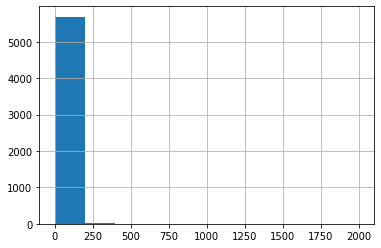

In [ ]:
health_df["SexNumPartnLife"].hist()

In [ ]:
health_df["SexNumPartnLife"].describe()

count    5725.000000
mean       15.085066
std        57.846434
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2000.000000
Name: SexNumPartnLife, dtype: float64

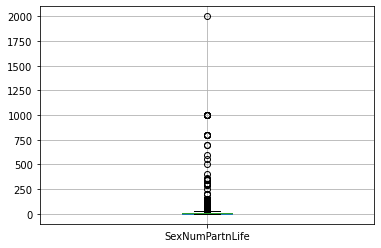

In [ ]:
health_df.boxplot(column=["SexNumPartnLife"])

#### SexNumPartYear

In [ ]:
health_df["SexNumPartYear"].value_counts()

1.0     3312
0.0      848
2.0      380
3.0      161
5.0       65
4.0       49
6.0       23
8.0       16
9.0       13
7.0       11
12.0       9
10.0       9
30.0       6
50.0       5
17.0       4
20.0       3
14.0       3
15.0       3
69.0       2
19.0       2
18.0       2
13.0       1
11.0       1
Name: SexNumPartYear, dtype: int64

In [ ]:
health_df["SexNumPartYear"].unique()

array([ 1., nan,  0.,  3.,  2.,  4., 10., 50.,  6., 12.,  5.,  9., 13.,
        8., 30., 19., 20.,  7., 14., 15., 17., 18., 69., 11.])

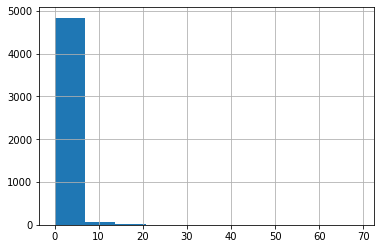

In [ ]:
health_df["SexNumPartYear"].hist()

In [ ]:
health_df["SexNumPartYear"].describe()

count    4928.000000
mean        1.342330
std         2.782688
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        69.000000
Name: SexNumPartYear, dtype: float64

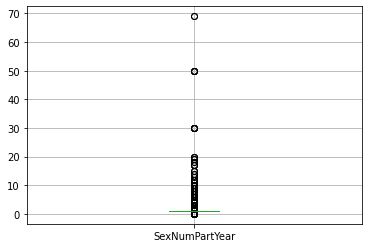

In [ ]:
health_df.boxplot(column=["SexNumPartYear"])

#### SexOrientation

In [ ]:
health_df["SexOrientation"].value_counts()

Heterosexual    4638
Bisexual         119
Homosexual        85
Name: SexOrientation, dtype: int64

In [ ]:
health_df["SexOrientation"].unique()

array(['Heterosexual', nan, 'Bisexual', 'Homosexual'], dtype=object)

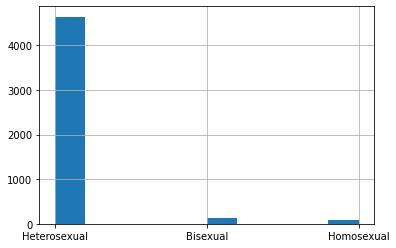

In [ ]:
health_df["SexOrientation"].hist()

In [ ]:
health_df["SexOrientation"].describe()

count             4842
unique               3
top       Heterosexual
freq              4638
Name: SexOrientation, dtype: object

#### ID

In [ ]:
health_df["ID"].value_counts()

70324    8
62927    7
69626    7
63297    7
66113    6
        ..
58659    1
57277    1
58976    1
56146    1
66189    1
Name: ID, Length: 6779, dtype: int64

In [ ]:
health_df["ID"].unique()

array([55829, 57112, 60232, ..., 62959, 68101, 66189])

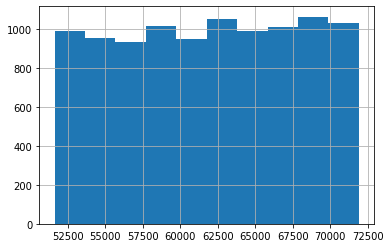

In [ ]:
health_df["ID"].hist()

In [ ]:
health_df["ID"].describe()

count    10000.00000
mean     61944.64380
std       5871.16716
min      51624.00000
25%      56904.50000
50%      62159.50000
75%      67039.00000
max      71915.00000
Name: ID, dtype: float64

# Limpieza

#### Eliminación de columnas de ID's

In [ ]:
len(health_df["ID"].unique())

6779

In [ ]:
len(health_df["ID"].unique())/health_df.shape[0]

0.6779

In [ ]:
health_df.drop(columns=["ID"], inplace=True)

In [ ]:
corr = health_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,HHIncomeMid,Poverty,HomeRooms,Weight,Length,Height,BMI,DiabetesAge,nPregnancies,nBabies,Age1stBaby,AlcoholDay,AlcoholYear,SmokeAge,AgeFirstMarij,SexAge,SexNumPartnLife,SexNumPartYear
Age,1.000000,0.020382,0.180783,0.028623,0.513243,0.912913,0.460179,0.407876,0.759406,0.215695,0.308105,-0.001443,-0.251755,0.110011,0.150319,0.179321,0.189850,0.044010,-0.113800
HHIncomeMid,0.020382,1.000000,0.895687,0.452118,0.032260,-0.002612,0.116781,-0.063549,-0.103365,-0.169326,-0.206228,0.374402,-0.136410,0.166111,0.089321,0.070264,0.146995,-0.032429,-0.080175
Poverty,0.180783,0.895687,1.000000,0.401718,0.104782,-0.033804,0.173568,0.003800,-0.012862,-0.167472,-0.207675,0.347492,-0.193958,0.171479,0.088630,0.098705,0.173629,-0.022703,-0.079212
HomeRooms,0.028623,0.452118,0.401718,1.000000,-0.014478,0.042267,0.013814,-0.059011,-0.100191,0.030197,0.009544,0.315387,-0.117288,0.093628,0.049902,0.011554,0.069815,-0.021197,-0.042467
Weight,0.513243,0.032260,0.104782,-0.014478,1.000000,0.921963,0.748952,0.902185,-0.104053,0.063353,0.018767,-0.149981,0.096221,-0.062788,-0.009234,0.051882,-0.035428,0.015027,-0.029110
Length,0.912913,-0.002612,-0.033804,0.042267,0.921963,1.000000,0.987283,0.066641,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Height,0.460179,0.116781,0.173568,0.013814,0.748952,0.987283,1.000000,0.434588,-0.140241,-0.098314,-0.141495,0.134840,0.149388,0.155936,-0.055204,-0.006567,-0.041055,0.060147,0.013533
BMI,0.407876,-0.063549,0.003800,-0.059011,0.902185,0.066641,0.434588,1.000000,-0.053662,0.103337,0.072103,-0.198108,0.028309,-0.147991,0.019669,0.059317,-0.018953,-0.013645,-0.036710
DiabetesAge,0.759406,-0.103365,-0.012862,-0.100191,-0.104053,nan,-0.140241,-0.053662,1.000000,0.101916,0.134187,-0.122409,-0.191073,0.041567,0.179873,0.194025,-0.068649,0.092623,0.021019
nPregnancies,0.215695,-0.169326,-0.167472,0.030197,0.063353,nan,-0.098314,0.103337,0.101916,1.000000,0.741000,-0.228222,-0.053041,-0.072613,0.061709,-0.027132,-0.099590,-0.013377,-0.016259


#### Eliminación de columnas altamente correlacionadas

In [ ]:
health_df.drop(columns=["HHIncomeMid","nPregnancies","DiabetesAge","Length","Weight","Height"], inplace=True)

#### Education

In [ ]:
health_df["Education"].isna().sum()/health_df.shape[0]

0.2779

In [ ]:
moda=health_df["Education"].mode()
moda

0    SomeCollege
dtype: object

In [ ]:
health_df.loc[(health_df["Education"].isna()),'Education']='SomeCollege'

#### MaritalStatus

In [ ]:
health_df["MaritalStatus"].isna().sum()/health_df.shape[0]

0.2769

In [ ]:
moda=health_df["MaritalStatus"].mode()
moda

0    Married
dtype: object

In [ ]:
health_df.loc[(health_df["MaritalStatus"].isna()),'MaritalStatus']='Married'

#### HHIncome

In [ ]:
health_df["HHIncome"].isna().sum()

811

In [ ]:
health_df["HHIncome"].isna().sum()/health_df.shape[0]

0.0811

In [ ]:
index_to_drop=health_df.loc[health_df['HHIncome'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

#### Poverty

In [ ]:
health_df["Poverty"].isna().sum()

16

In [ ]:
health_df["Poverty"].isna().sum()/health_df.shape[0]

0.0017412123190771575

In [ ]:
index_to_drop=health_df.loc[health_df['Poverty'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

#### HomeRooms

In [ ]:
health_df["HomeRooms"].isna().sum()

3

In [ ]:
health_df["HomeRooms"].isna().sum()/health_df.shape[0]

0.00032704676768777934

In [ ]:
index_to_drop=health_df.loc[health_df['HomeRooms'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

In [ ]:
upper_bound, lower_bound,median=getLimitsAndMedian(health_df['HomeRooms'])

Q1:  5.0  Q3:  8.0  Median:  6.0  IQR:  3.0


In [ ]:
health_df.loc[(health_df["HomeRooms"] > upper_bound) | (health_df["HomeRooms"] < lower_bound),"HomeRooms"]=6

#### HomeOwn

In [ ]:
health_df["HomeOwn"].isna().sum()

2

In [ ]:
health_df["HomeOwn"].isna().sum()/health_df.shape[0]

0.00021810250817884405

In [ ]:
index_to_drop=health_df.loc[health_df['HomeOwn'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

#### BMI

In [ ]:
health_df["BMI"].isna().sum()

337

In [ ]:
index_to_drop=health_df.loc[health_df['BMI'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

In [ ]:
upper_bound, lower_bound,median=getLimitsAndMedian(health_df['BMI'])

Q1:  21.595  Q3:  31.0  Median:  25.99  IQR:  9.405000000000001


In [ ]:
health_df.loc[(health_df["BMI"] > upper_bound) | (health_df["BMI"] < lower_bound),"BMI"]=25.99

#### Diabetes

In [ ]:
health_df["Diabetes"].isna().sum()

3

In [ ]:
health_df["Diabetes"].isna().sum()/health_df.shape[0]

0.0003397123768542634

In [ ]:
index_to_drop=health_df.loc[health_df['Diabetes'].isna()].index 
health_df.drop(index_to_drop,inplace = True)

#### Depressed

In [ ]:
health_df["Depressed"].isna().sum()

2723

In [ ]:
health_df["Depressed"].isna().sum()/health_df.shape[0]

0.30845038513819667

In [ ]:
moda=health_df["Depressed"].mode()
moda

0    None
dtype: object

In [ ]:
health_df.loc[(health_df["Depressed"].isna()),'Depressed']='None'

#### nBabies

In [ ]:
health_df["nBabies"].isna().sum()

6609

In [ ]:
health_df["nBabies"].isna().sum()/health_df.shape[0]

0.7486406887177164

In [ ]:
moda=health_df["nBabies"].mode()
moda

0    2.0
dtype: float64

In [ ]:
health_df.loc[(health_df["nBabies"].isna()),'nBabies']=2

#### Age1stBaby

In [ ]:
health_df["Age1stBaby"].isna().sum()

7103

In [ ]:
health_df["Age1stBaby"].isna().sum()/health_df.shape[0]

0.8045990031717263

In [ ]:
health_df.drop(columns=["Age1stBaby"], inplace=True)

#### TVHrsDay

In [ ]:
health_df["TVHrsDay"].isna().sum()

4381

In [ ]:
health_df["TVHrsDay"].isna().sum()/health_df.shape[0]

0.49626189397372

In [ ]:
moda=health_df["TVHrsDay"].mode()
moda

0    2_hr
dtype: object

In [ ]:
health_df.loc[(health_df["TVHrsDay"].isna()),'TVHrsDay']='2_hr'

#### CompHrsDay

In [ ]:
health_df["CompHrsDay"].isna().sum()

4378

In [ ]:
health_df["CompHrsDay"].isna().sum()/health_df.shape[0]

0.49592206615314904

In [ ]:
moda=health_df["CompHrsDay"].mode()
moda

0    0_to_1_hr
dtype: object

In [ ]:
health_df.loc[(health_df["CompHrsDay"].isna()),'CompHrsDay']='0_to_1_hr'

#### AlcoholDay

In [ ]:
health_df["AlcoholDay"].isna().sum()

4298

In [ ]:
health_df["AlcoholDay"].isna().sum()/health_df.shape[0]

0.48685999093792476

In [ ]:
mediana=health_df["AlcoholDay"].median()
mediana

2.0

In [ ]:
health_df.loc[(health_df["AlcoholDay"].isna()),'AlcoholDay']=2

#### AlcoholYear

In [ ]:
health_df["AlcoholYear"].isna().sum()

3396

In [ ]:
health_df["AlcoholYear"].isna().sum()/health_df.shape[0]

0.38468509288627095

In [ ]:
mediana=health_df["AlcoholYear"].median()
mediana

24.0

In [ ]:
health_df.loc[(health_df["AlcoholYear"].isna()),'AlcoholYear']=24

#### SmokeNow

In [ ]:
health_df["SmokeNow"].isna().sum()

5946

In [ ]:
health_df["SmokeNow"].isna().sum()/health_df.shape[0]

0.673538740371545

In [ ]:
moda=health_df["SmokeNow"].mode()
moda

0    No
dtype: object

In [ ]:
health_df.loc[(health_df["SmokeNow"].isna()),'SmokeNow']='No'

#### SmokeAge

In [ ]:
health_df["SmokeAge"].isna().sum()

6064

In [ ]:
health_df["SmokeAge"].isna().sum()/health_df.shape[0]

0.686905301314001

In [ ]:
mediana=health_df["SmokeAge"].median()
mediana

17.0

In [ ]:
health_df.loc[(health_df["SmokeAge"].isna()),'SmokeAge']=17

#### Marijuana

In [ ]:
health_df["Marijuana"].isna().sum()

4283

In [ ]:
health_df["Marijuana"].isna().sum()/health_df.shape[0]

0.48516085183507024

In [ ]:
moda=health_df["Marijuana"].mode()
moda

0    Yes
dtype: object

In [ ]:
health_df.loc[(health_df["Marijuana"].isna()),'Marijuana']='Yes'

#### AgeFirstMarij

In [ ]:
health_df["AgeFirstMarij"].isna().sum()

6144

In [ ]:
health_df["AgeFirstMarij"].isna().sum()/health_df.shape[0]

0.6959673765292252

In [ ]:
mediana=health_df["AgeFirstMarij"].median()
mediana

16.0

In [ ]:
health_df.loc[(health_df["AgeFirstMarij"].isna()),'AgeFirstMarij']=16

#### HardDrugs

In [ ]:
health_df["HardDrugs"].isna().sum()

3520

In [ ]:
health_df["HardDrugs"].isna().sum()/health_df.shape[0]

0.3987313094698686

In [ ]:
moda=health_df["HardDrugs"].mode()
moda

0    No
dtype: object

In [ ]:
health_df.loc[(health_df["HardDrugs"].isna()),'HardDrugs']='No'

#### SexEver

In [ ]:
health_df["SexEver"].isna().sum()

3523

In [ ]:
health_df["SexEver"].isna().sum()/health_df.shape[0]

0.3990711372904395

In [ ]:
moda=health_df["SexEver"].mode()
moda

0    Yes
dtype: object

In [ ]:
health_df.loc[(health_df["SexEver"].isna()),'SexEver']='Yes'

#### SexAge

In [ ]:
health_df["SexAge"].isna().sum()

3723

In [ ]:
health_df["SexAge"].isna().sum()/health_df.shape[0]

0.42172632532850024

In [ ]:
mediana=health_df["SexAge"].median()
mediana

17.0

In [ ]:
health_df.loc[(health_df["SexAge"].isna()),'SexAge']=17

#### SexNumPartnLife

In [ ]:
health_df["SexNumPartnLife"].isna().sum()

3555

In [ ]:
health_df["SexNumPartnLife"].isna().sum()/health_df.shape[0]

0.40269596737652924

In [ ]:
mediana=health_df["SexNumPartnLife"].median()
mediana

5.0

In [ ]:
health_df.loc[(health_df["SexNumPartnLife"].isna()),'SexNumPartnLife']=5

#### SexNumPartYear

In [ ]:
health_df["SexNumPartYear"].isna().sum()

4296

In [ ]:
health_df["SexNumPartYear"].isna().sum()/health_df.shape[0]

0.4866334390575442

In [ ]:
mediana=health_df["SexNumPartYear"].median()
mediana

1.0

In [ ]:
health_df.loc[(health_df["SexNumPartYear"].isna()),'SexNumPartYear']=1

#### SexOrientation

In [ ]:
health_df["SexOrientation"].isna().sum()

4360

In [ ]:
health_df["SexOrientation"].isna().sum()/health_df.shape[0]

0.4938830992297236

In [ ]:
moda=health_df["SexOrientation"].mode()
moda

0    Heterosexual
dtype: object

In [ ]:
health_df.loc[(health_df["SexOrientation"].isna()),'SexOrientation']='Heterosexual'

# Exportar datos

In [ ]:
health_df.to_csv("NCHS_clean.csv")